In [294]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [295]:
def smooth(x, width=5):
    return np.convolve(x, np.ones(width) / width, 'valid')

def ddx(x):
    return np.convolve(x, [1, 0, -1], 'valid')

def get_tick_time(x):
    x = x.to_numpy()
        
    return (x[-1] - x[0]) / (x.size - 1)

In [296]:
big_ddx = 0.05
big_neg_ddx = -0.06
small_ddx = 0
big_v = 0.9
small_v = 0.05

def fall(seconds, volts, plot=False, width=60):
    tick_time = get_tick_time(seconds)
    
    s = smooth(volts, width=width)
    d = ddx(s)
                
    start = np.where(d < -big_ddx)[0].min() - 1
    after = d.copy()
    after[:start] = np.NaN
    end = np.where(after > -small_ddx)[0].min() - 1
    
    if plot:
        plt.plot(seconds, volts)
        plt.plot(seconds[start + width // 2: end + width // 2], volts[start + width // 2: end + width // 2])
        plt.figure()
    
    return (end - start) * tick_time * 1000000


def rise(seconds, volts, plot=False, width=60, big_ddx=big_ddx):
    tick_time = get_tick_time(seconds)
    
    s = smooth(volts, width=width)
    d = ddx(s)
                            
    start = np.where(d > big_ddx)[0].min() - 1
    start_high = np.where(s > big_v)[0].min()
    after = d.copy()
    after[:start_high] = np.NaN
    end = np.where(after < small_ddx)[0].min() - 1
    
    if plot:
        plt.plot(seconds, volts)
        plt.plot(seconds[start + width // 2: end + width // 2], volts[start + width // 2: end + width // 2])
        plt.figure()
    
    return (end - start) * tick_time * 1000000


def on(seconds, volts, plot=False, width=60):
    tick_time = get_tick_time(seconds)
    
    s = smooth(volts, width=width)
    
    start = np.where(s > big_v)[0].min()
    after = s.copy()
    after[:start] = np.NaN
    
    end = np.where(after < big_v)[0].min()
    
    if plot:
        plt.plot(seconds, volts)
        plt.plot(seconds[start + width // 2: end + width // 2], volts[start + width // 2: end + width // 2])
        plt.figure()
    
    return (end - start) * tick_time * 1000000

In [297]:
def read_and_normalize(file):
    df = pd.read_csv(os.path.join(file), header=1)
    df.apply(pd.to_numeric)

    seconds = df['second'][5:-5]
    volts = df['Volt'][5:-5]
        
    volts -= np.min(smooth(volts, 40))
    volts /= np.max(smooth(volts, 40))
    
    return seconds, volts

In [298]:
def rise_plus_on(seconds, volts, plot=False, smoothing_width=10):
    tick_time = get_tick_time(seconds)
    
    # s = smooth(volts, width=smoothing_width)
    # d = ddx(s)
    
    seconds, volts = seconds.to_numpy(), volts.to_numpy()
    
    start = 0
    k = []
    
    for i in range(volts.size - 10):
        if volts[i+10] - volts[i] > 0.2:
            start = i
            break
        
    plt.plot(k)
        
    end = 0
            
    for i in range(volts.size // 2, volts.size):
        if volts[i+10] - volts[i] < -0.2:
            end = i
            break
                            
    # start = np.where(d > big_ddx)[0].min() - 1
    # after = d.copy()
    # # Only look at the second half of the signal
    # after[:after.size // 2] = np.NaN
    # end = np.where(after < big_neg_ddx)[0].min() - 1
    
    if plot:
        plt.plot(seconds, volts)
        plt.plot(seconds[start: end], volts[start: end])
        plt.figure()
    
    # if plot:
    #     plt.plot(seconds, volts)
    #     plt.plot(seconds[start + smoothing_width // 2: end + smoothing_width // 2], volts[start + smoothing_width // 2: end + smoothing_width // 2])
    #     plt.figure()
    
    return (end - start) * tick_time * 1000000
    

In [299]:
# colors = ['white', 'red', 'green', 'blue', 'violet']
# graph_colors = ["black", "r", "g", "b", "m"]

# plt.figure()
# plt.title("LED Rise times")
# plt.xlabel("Delay (us)")
# plt.ylabel("Rise Time (us)")

# for color, gc in zip(colors, graph_colors):
#     rises = []
    
#     for delay in [200, 400, 600, 800, 1000]:
#         seconds, volts = read_file(f'./data/{color}/{delay}_rise.csv')
        
#         if color == 'white':
#             rises.append(rise(seconds, volts, False, width=100, big_ddx=0.005))
#         else:
#             rises.append(rise(seconds, volts, False))
                        
#     plt.plot([200, 400, 600, 800, 1000], rises, label=color, color=gc)
    
# plt.legend()

801.4999999999992

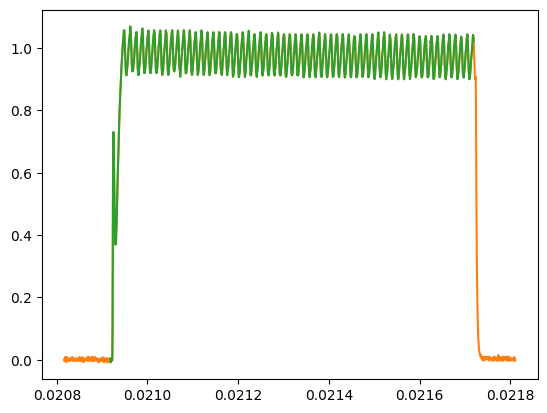

<Figure size 640x480 with 0 Axes>

In [300]:
colors = ['amber', 'blue', 'cyan', 'deep_red', 'far_red', 'green', 'lime', 'mint', 'red', 'red_orange', 'royal_blue', 'white']
smoothing_widths = [10] * 12
# Smooth white more than other colors
smoothing_widths[11] = 50

seconds, volts = read_and_normalize("data/blue/800.csv")
rise_plus_on(seconds, volts, plot=True, smoothing_width=10)
# s = smooth(volts, width=10)
# d = ddx(s)
# plt.plot(d)

In [301]:
# colors = ['white', 'red', 'green', 'blue', 'violet']
# graph_colors = ["black", "r", "g", "b", "m"]

# plt.figure()
# plt.title("LED Fall times")
# plt.xlabel("Delay (us)")
# plt.ylabel("Fall Time (us)")

# for color, gc in zip(colors, graph_colors):
#     falls = []
    
#     for delay in [200, 400, 600, 800, 1000]:
#         seconds, volts = read_file(f'./data/{color}/{delay}_fall.csv')
        
#         if color == 'white':
#             falls.append(fall(seconds, volts, False, width=100))
#         else:
#             falls.append(fall(seconds, volts, False))
                        
#     plt.plot([200, 400, 600, 800, 1000], falls, label=color, color=gc)
    
# plt.legend()